# DATA SCIENCE WITH PYTHON  REPORT COVID-19 

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

# Data Visualization COVID-19

In [1]:
from IPython.display import IFrame
IFrame('https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6', height=700, width=960)

# Data Analaysis COVID-19 Report i Data Science with Python

In [1]:
%config InlineBackend.figure_formats = ['svg']
import math
from numpy import log, exp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (11, 4)   # need bigger size otherwise xlabels are cut-off in svg files

import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np
import iminuit

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')

def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#

def fetch_data(names = ['confirmed', 'deaths']):
    """Return 3 data frames:
    [confirmed, deaths], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_covid19_" + name + "_global.csv")
        df = pd.read_csv(url, index_col=1)
    
        if not name == 'Recovered':
            location_info['Lat'] = df['Lat']
            location_info['Long'] = df['Long']
            location_info['Province/State'] = df['Province/State']
            location_info['location'] = df.index + "-" + df['Province/State']
        else:
            pass  # no location info in recovered since 14 March
        ## df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs


confirmed, deaths = fetch_data()

# show counries with mosth deaths
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[0:10,-8:]

confirmed : last data point from 2020-04-11 00:00:00
deaths    : last data point from 2020-04-11 00:00:00


2020-04-04 00:00:00  2020-04-05 00:00:00  2020-04-06 00:00:00  \
Country/Region                                                                  
US                             8407                 9619                10783   
Italy                         15362                15887                16523   
Spain                         11947                12641                13341   
France                         7560                 8078                 8911   
United Kingdom                 4313                 4934                 5373   
Iran                           3452                 3603                 3739   
Belgium                        1283                 1447                 1632   
China                          3207                 3210                 3212   
Germany                        1444                 1584                 1810   
Netherlands                    1651                 1766                 1867   

                2020-04-07 00:00:00  2020-04-08 00:00:00  2020-04-09 00:00:00  \
Country/Region                                                                  
US                            12722                14695                16478   
Italy                         17127                17669                18279   
Spain                         14045                14792                15447   
France                        10328                10869                12210   
United Kingdom                 6159                 7097                 7978   
Iran                           3872                 3993                 4110   
Belgium                        2035                 2240                 2523   
China                          3212                 3213                 3215   
Germany                        2016                 2349                 2607   
Netherlands                    2101                 2248                 2396   

                2020-04-10 00:00:00  2020-04-11 00:00:00  
Country/Region                                            
US                            18586                20463  
Italy                         18849                19468  
Spain                         16081                16606  
France                        13197                13832  
United Kingdom                 8958                 9875  
Iran                           4232                 4357  
Belgium                        3019                 3346  
China                          3216                 3219  
Germany                        2767                 2736  
Netherlands                    2511                 2643

In [2]:
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[:,-8:]


2020-04-04 00:00:00  2020-04-05 00:00:00  2020-04-06 00:00:00  \
Country/Region                                                                  
US                             8407                 9619                10783   
Italy                         15362                15887                16523   
Spain                         11947                12641                13341   
France                         7560                 8078                 8911   
United Kingdom                 4313                 4934                 5373   
...                             ...                  ...                  ...   
France                            0                    0                    0   
France                            0                    0                    0   
Vietnam                           0                    0                    0   
France                            0                    0                    0   
Yemen                             0                    0                    0   

                2020-04-07 00:00:00  2020-04-08 00:00:00  2020-04-09 00:00:00  \
Country/Region                                                                  
US                            12722                14695                16478   
Italy                         17127                17669                18279   
Spain                         14045                14792                15447   
France                        10328                10869                12210   
United Kingdom                 6159                 7097                 7978   
...                             ...                  ...                  ...   
France                            0                    0                    0   
France                            0                    0                    0   
Vietnam                           0                    0                    0   
France                            0                    0                    0   
Yemen                             0                    0                    0   

                2020-04-10 00:00:00  2020-04-11 00:00:00  
Country/Region                                            
US                            18586                20463  
Italy                         18849                19468  
Spain                         16081                16606  
France                        13197                13832  
United Kingdom                 8958                 9875  
...                             ...                  ...  
France                            0                    0  
France                            0                    0  
Vietnam                           0                    0  
France                            0                    0  
Yemen                             0                    0  

[264 rows x 8 columns]

In [3]:
def double_time_exponential(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate(double_time):
    return log(2)/double_time

def double_time(growth_rate):
    return log(2)/growth_rate


# t1, t2, q1, q2 = 0, 1, 1, 2
# double_time_exponential(t1, t2, q1, q2), growth_rate(double_time_exponential(t1, t2, q1, q2) )

def double_time_exponential(q2_div_q1, t2_minus_t1=None):
    # print(f"double_time_exponential: {q2_div_q1}, {t2_minus_t1} ")
    if t2_minus_t1 is None:
        t2_minus_t1 = np.ones(q2_div_q1.shape)
        # print(f"shape t: {t2_minus_t1.shape}, shape q: {q2_div_q1.shape}")
        # print(f"type t: {type(t2_minus_t1)}, type q: {type(q2_div_q1.shape)}")

    return t2_minus_t1 * np.log(2) / np.log(q2_div_q1) 


def stack_country(country = "Germany"):

    #create one DataFrame for country/region
    c_df = pd.DataFrame()
    if country == "United Kingdom":
        # UK has many provinces that keep changing. Sum to get all (most relevant is mainland UK)
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
    elif country == "China": 
        # Use only Hubei province
        tmp = confirmed.loc[country]
        c_df['confirmed'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        tmp = deaths.loc[country]
        c_df['deaths'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        c_df.drop("Province/State", inplace=True)
    elif country in ['France']:
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
        c_df.drop('Province/State', inplace=True)
    elif country in ['US']:
        c_df['confirmed'] = confirmed.loc[country]
        c_df['deaths'] = deaths.loc[country]
    else:
        c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
        c_df['deaths'] = deaths.loc[country].drop('Province/State')

    # drop days with confirmed cases = 0
    c1 = c_df[c_df['confirmed'] != 0][1:]
    
    # drop another row
    c_df = c1
  
    c_df.index = string_to_date(c_df.index)
    c_df.country = country  # remember which country we work on, just in case
    
    c_df['days-td'] = c_df.index - c_df.index.min()  # days as TimeDelta type
    c_df['days'] = c_df['days-td'].astype("timedelta64[D]").astype(float)
    
    c_df['new_confirmed'] = c_df['confirmed'].diff()
    c_df['new_deaths'] = c_df['deaths'].diff()
    
    c_df['confirmed_pct'] = c_df['confirmed'].pct_change()+1
    c_df['deaths_pct'] = c_df['deaths'].pct_change()+1
    
    #return c_df
    # growth rate
    c_df['deaths_double_time'] = double_time_exponential(c_df['deaths_pct'].values)
    c_df['confirmed_double_time'] = double_time_exponential(c_df['confirmed_pct'].values)
    c_df['deaths_growth_rate'] = growth_rate(c_df['deaths_double_time'].values)
    c_df['confirmed_growth_rate'] = growth_rate(c_df['confirmed_double_time'].values)

    return c_df

In [4]:
import warnings
warnings.filterwarnings('ignore')
c = stack_country("Germany")
#c.tail(n=5)
c2 = stack_country("United Kingdom")
#c.tail(n=5)
#c2 = stack_country("Spain")
#c.tail(n=5)
c2 = stack_country("Italy")
#c2.tail(n=5)
#c2 = stack_country("France")
#c2.tail(n=5)
c2 = stack_country("China")
#c2.tail(n=5)
#c2 = stack_country("US")

c

confirmed deaths days-td  days new_confirmed new_deaths  \
2020-01-28         4      0  0 days   0.0           NaN        NaN   
2020-01-29         4      0  1 days   1.0             0          0   
2020-01-30         4      0  2 days   2.0             0          0   
2020-01-31         5      0  3 days   3.0             1          0   
2020-02-01         8      0  4 days   4.0             3          0   
...              ...    ...     ...   ...           ...        ...   
2020-04-07    107663   2016 70 days  70.0          4289        206   
2020-04-08    113296   2349 71 days  71.0          5633        333   
2020-04-09    118181   2607 72 days  72.0          4885        258   
2020-04-10    122171   2767 73 days  73.0          3990        160   
2020-04-11    124908   2736 74 days  74.0          2737        -31   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-28            NaN         NaN                 NaN   
2020-01-29       1.000000         NaN                 NaN   
2020-01-30       1.000000         NaN                 NaN   
2020-01-31       1.250000         NaN                 NaN   
2020-02-01       1.600000         NaN                 NaN   
...                   ...         ...                 ...   
2020-04-07       1.041490    1.113812            6.430622   
2020-04-08       1.052321    1.165179            4.534097   
2020-04-09       1.043117    1.109834            6.651419   
2020-04-10       1.033762    1.061373           11.637100   
2020-04-11       1.022403    0.988797          -61.521751   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-28                    NaN                 NaN                    NaN  
2020-01-29                    inf                 NaN               0.000000  
2020-01-30                    inf                 NaN               0.000000  
2020-01-31               3.106284                 NaN               0.223144  
2020-02-01               1.474770                 NaN               0.470004  
...                           ...                 ...                    ...  
2020-04-07              17.050543            0.107789               0.040652  
2020-04-08              13.591685            0.152874               0.050998  
2020-04-09              16.420042            0.104210               0.042213  
2020-04-10              20.875189            0.059564               0.033204  
2020-04-11              31.285186           -0.011267               0.022156  

[75 rows x 12 columns]

In [5]:
confirmed.loc["US"]

Province/State            NaN
2020-01-22 00:00:00         1
2020-01-23 00:00:00         1
2020-01-24 00:00:00         2
2020-01-25 00:00:00         2
                        ...  
2020-04-07 00:00:00    396223
2020-04-08 00:00:00    429052
2020-04-09 00:00:00    461437
2020-04-10 00:00:00    496535
2020-04-11 00:00:00    526396
Name: US, Length: 82, dtype: object

In [6]:
def overview_plot(c_df, rollingwindow=7):
    """expect """
    fig, axes = plt.subplots(4, 1, figsize=(8, 14))
    ax = axes[0]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'], '-b', label='confirmed')
    ax.plot(c_df.index, c_df['deaths'], '-r', label='deaths')
    ax.legend(loc='center left')
    country = c_df.country
    ax.set_title(country + " accumulated data")
    ax.set_yscale('log')

    ax = axes[1]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'].diff(), 'ob', label='day-to-day change confirmed')
    ax.plot(c_df.index, c_df['deaths'].diff(), 'xr', label='day-to-day change deaths')
    ax.legend(loc='center left')
    #ax.set_yscale('log')
    

    ax = axes[2]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_double_time'], 'xr', label='double time deaths')
    ax.plot(c_df.index, c_df['deaths_double_time'].rolling(rollingwindow, center=True).mean(),
            '-r', label='double time deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_double_time'], 'ob', label='double time confirmed')
    ax.plot(c_df.index, c_df['confirmed_double_time'].rolling(rollingwindow, center=True).mean(), 
            '-b', label='double time confirmed rolling')
    ax.legend(loc='center left')
    ax.set_ylabel('days to double numbers \n bigger is better')
    maxy = min(20, max(c_df['confirmed_double_time']))
    ax.set_ylim(0, maxy)

    ax = axes[3]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_growth_rate'], 'xr', label='growth rate deaths')
    ax.plot(c_df.index, c_df['deaths_growth_rate'].rolling(rollingwindow, center=True).mean(), 'r-', label='growth rate deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'], 'ob', label='confirmed growth rate')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'].rolling(rollingwindow, center=True).mean(), 
            'b-', label='confirmed growth rate rolling')
    ax.legend(loc='center left')
    ax.set_ylim(0, 0.5)
    ax.set_ylabel('growth rate r in\n f(t) = exp(r*t)\n(smaller is better)')
    
    # fig.savefig(f"figures/{country}-overview.svg")
    return axes

In [7]:
import warnings
warnings.filterwarnings('ignore')
china = stack_country('China')
germany = stack_country('Germany')
uk = stack_country("United Kingdom")
us = stack_country("US")
italy = stack_country("Italy")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1259ba250>,
      dtype=object)

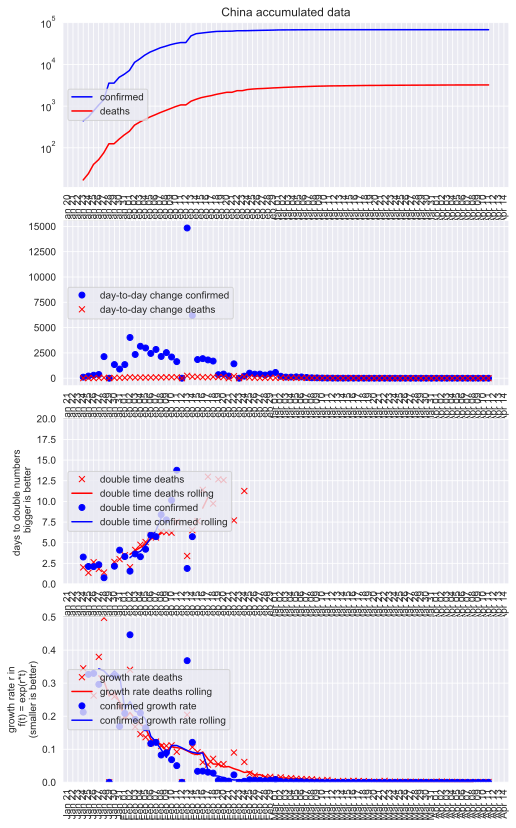

In [8]:
overview_plot(china)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12615e7d0>,
      dtype=object)

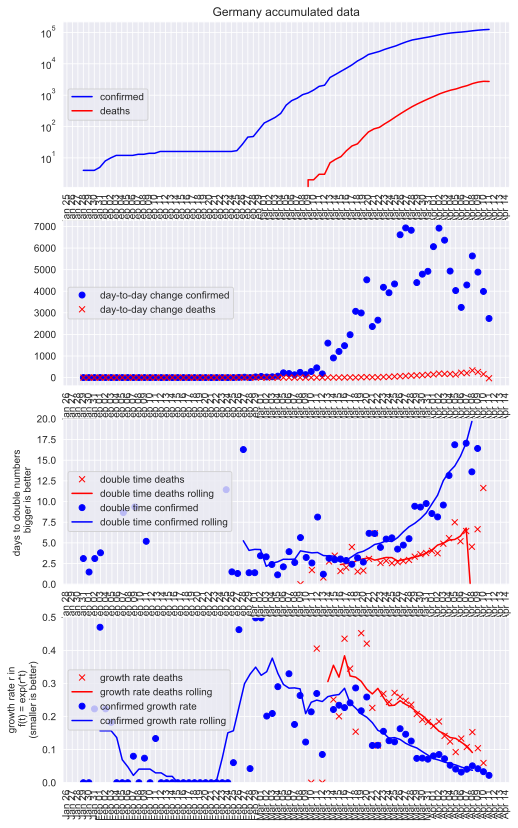

In [9]:
overview_plot(germany)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x127160410>,
      dtype=object)

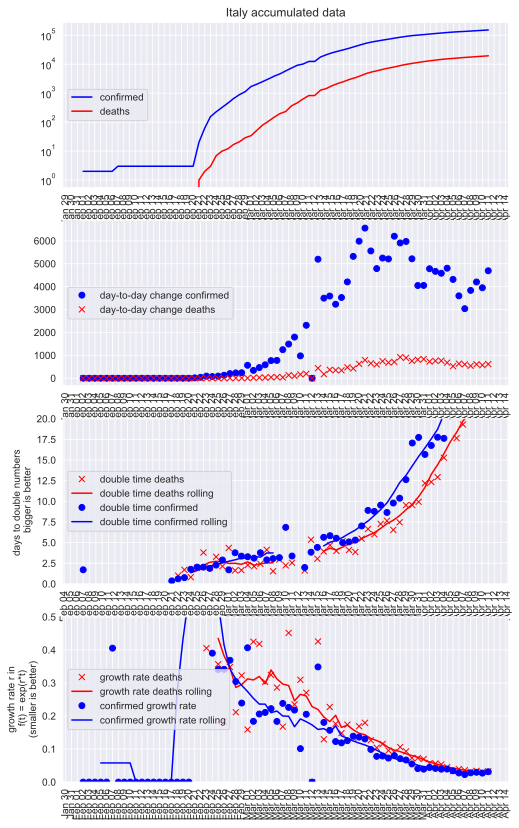

In [10]:
overview_plot(italy)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x127c2dd10>,
      dtype=object)

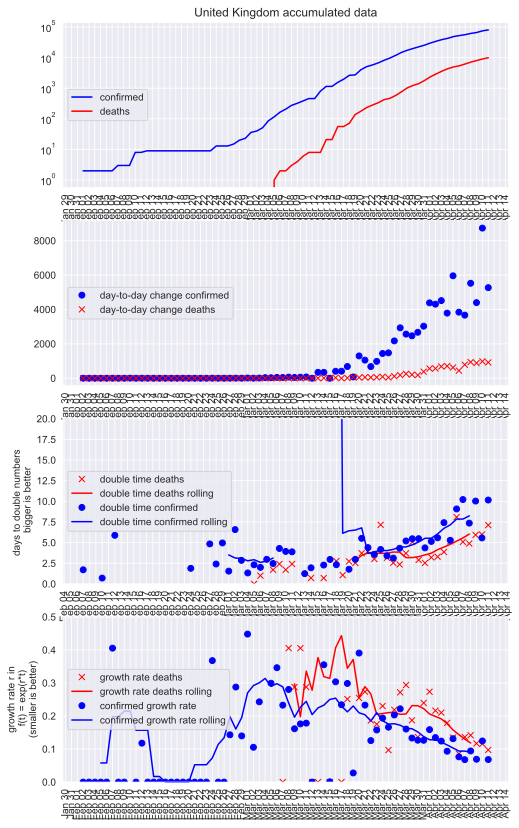

In [11]:
overview_plot(uk)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12807f810>,
      dtype=object)

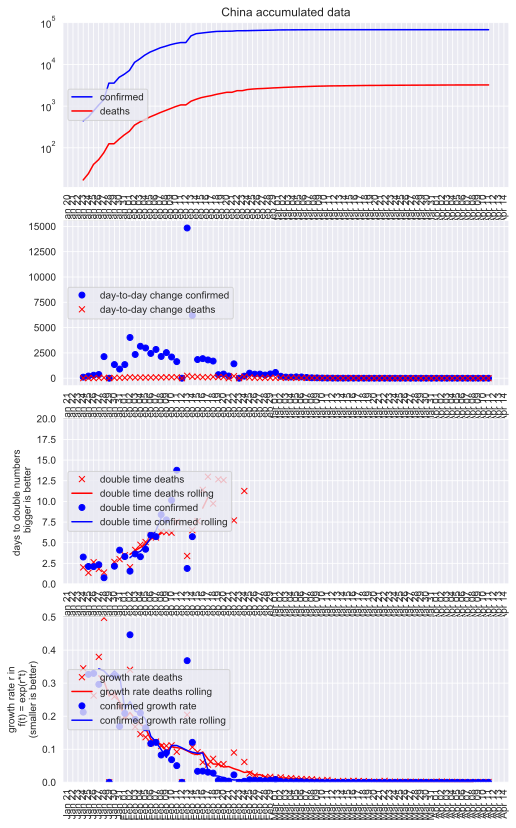

In [12]:
c = stack_country('China')
overview_plot(c)

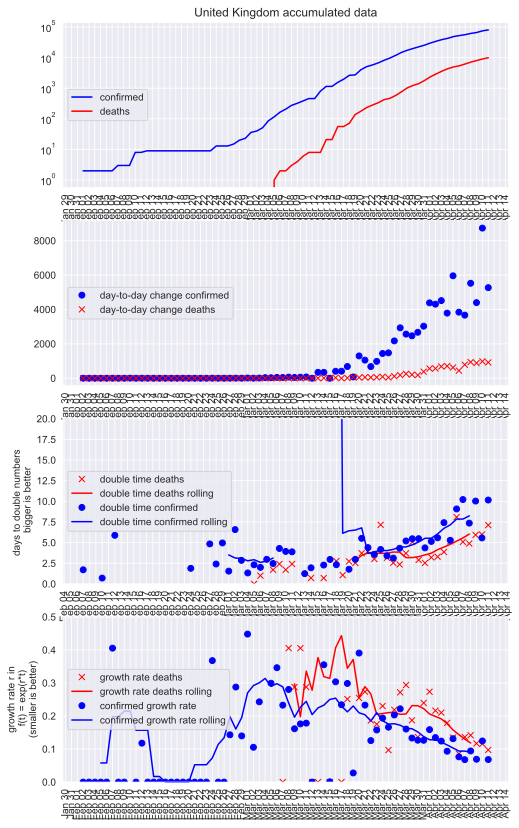

In [13]:
uk = stack_country('United Kingdom')
overview_plot(uk);

In [14]:
# compute doubling time (and growth rate) for a longer sequence of days (by fitting)


reduced chi^2: 0.10245909602971366
r   : 0.16
t0  : 11.2
a0  : 4.28



------------------------------------------------------------------
| FCN = 0.1025                  |     Ncalls=160 (160 total)     |
| EDM = 4.4E-05 (Goal: 0.0002)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | r    |   0.16    |   0.10    |            |            |         |         |       |
| 1 | t0   |    11     |    13     |            |            |         |         |       |
| 2 | a0   |    4.3    |    2.9    |            |            |         |         |       |
------------------------------------------------------------------------------------------

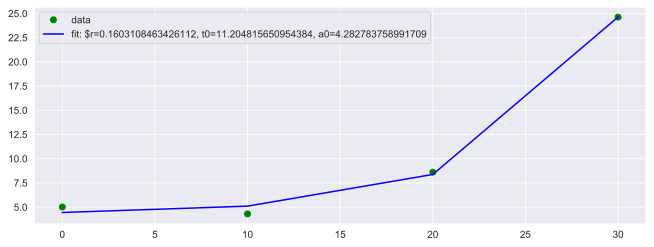

In [15]:
def pretty_params(**par):
    end='\n'
    s = ""
    for p in par:
        s += f"{p:3} : {par[p]:.3g}" + end
    return s


def model(xdata, r, t0, a0):
    return np.exp(r*(xdata-t0))+a0



def exp_fit(xdata, ydata, p0):
    r, t0, a0 = p0
    
    def least_squares(r, t0, a0):
        yvar = 10
        return sum((ydata - model(xdata, r, t0, a0))**2)/yvar
    
    m = iminuit.Minuit(least_squares, 
                       r=r, t0=t0, a0=a0, error_r=0.02, error_t0=0.2, error_a0=1, 
                       errordef=1)
    res = m.migrad()
    print(f"reduced chi^2: {m.fval / (len(ydata) - 3)}")
    r, t0, a0 = m.np_values()
    print(pretty_params(r=r, t0=t0, a0=a0))
    
    return m, res

def plot(xdata, ydata, r, t0, a0, annotate=""):
    #r, t0, a0 = m.np_values()

    fitted = model(xdata, r, t0, a0)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xdata, ydata, 'og')
    ax.plot(xdata, fitted, '-b')
    ax.legend(["data", f"fit: $r={r}, t0={t0}, a0={a0}"])
    #ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
    ax.set_title(annotate)
    #ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    #ax.tick_params(axis='x', rotation=90)
    #fig.savefig('figures/infections-with-model-fit.svg')
    # print(fitted_infections)
    return ax

def test_model(): 
    xdata = np.linspace(0, 30, 4)
    ydata = 0 + np.exp(0.1*(xdata - 0)) + 5*np.random.random_sample(xdata.shape)    
    m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
    r, t0, a0 = m.np_values()
    plot(xdata, ydata, r, t0, a0)
    return res, m, xdata, ydata


res, m, xdata, ydata = test_model()
res


reduced chi^2: 0.012555068401586477
r   : 0.0347
t0  : 46.4
a0  : 6.78e+04

Double time: 20.0 days


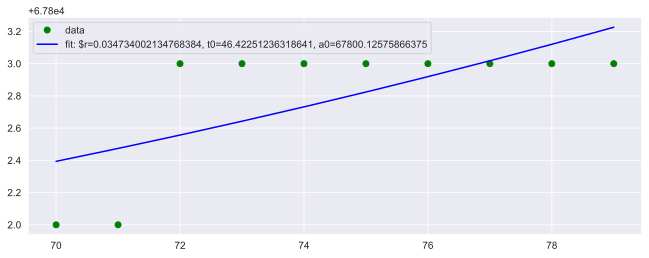

In [16]:
# Exponential fit through last n days
series = c['confirmed']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
plot(xdata, ydata, r, t0, a0)
print(f"Double time: {double_time(r):.1f} days")


reduced chi^2: 0.3643822927745227
r   : 0.00868
t0  : -548
a0  : 2.99e+03

Double time: 79.8 days


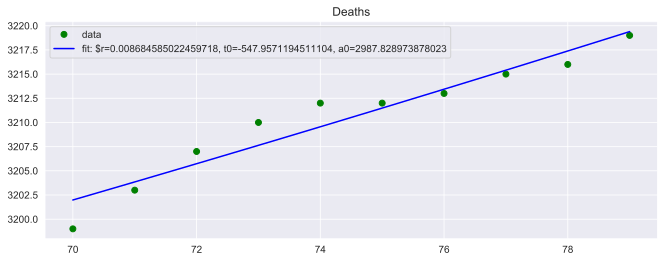

In [17]:
# Exponential fit through last n days, deaths
series = c['deaths']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
ax = plot(xdata, ydata, r, t0, a0)
ax.set_title("Deaths")
print(f"Double time: {double_time(r):.1f} days")


In [18]:
def grow_rate_n_days(series, n=7):
    """Use the last 4 data points to estimate growth rate (and doubling time) for each day"""
    par = pd.DataFrame(index=series.index, columns=['r', 't0', 'a0', 'chi2'])
    print(f"Data stack shape = {series.shape}")
    for i in range(n, len(series)):
        start = i-n
        end = i
        print(f"Working on {start} to {end}, this is {start}/{len(series-n)}")
        xdata_0 = (series.index[start:end] - series.index[0])
        xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
        ydata = series.values[start:end]
        # Attempt fit
        m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
        r, t0, a0 = m.np_values()
        par.iloc[i].at['r'] = r
        par.iloc[i].at['t0'] = t0
        par.iloc[i].at['a0'] = a0
        print(f"r={r:10}, t0={t0:10}, a0={a0:10}")
        plot(xdata, ydata, r, t0, a0)
            
    return par

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 136981.21703986567
r   : 0.0583
t0  : -194
a0  : -5.47e+04

r=0.058319414029242185, t0=-194.21781189387963, a0=-54698.46400870063
Working on 1 to 8, this is 1/20
reduced chi^2: 164555.00365031467
r   : 0.0159
t0  : -802
a0  : -3.2e+05

r=0.01591111151690398, t0=-801.8381743554311, a0=-320132.668093281
Working on 2 to 9, this is 2/20
reduced chi^2: 245500.1283127529
r   : 0.013
t0  : -991
a0  : -3.83e+05

r=0.01303869962298066, t0=-991.4501956267899, a0=-383430.02987374685
Working on 3 to 10, this is 3/20
reduced chi^2: 151974.74112495722
r   : 0.0148
t0  : -858
a0  : -3.06e+05

r=0.014830174734925991, t0=-858.1422002093551, a0=-306408.639859565
Working on 4 to 11, this is 4/20
reduced chi^2: 75575.6597376845
r   : 0.0428
t0  : -267
a0  : -5.93e+04

r=0.04284815343279194, t0=-267.136805746902, a0=-59312.62736556465
Working on 5 to 12, this is 5/20
reduced chi^2: 9162.480536546547
r   : 0.0962
t0  : -106
a0  : 1.45e+

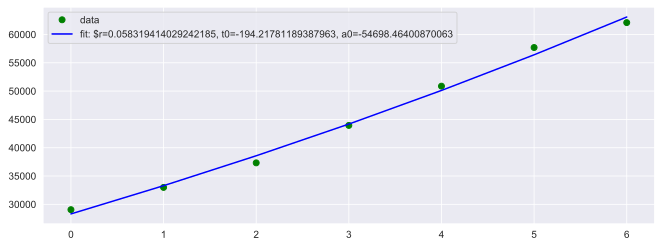

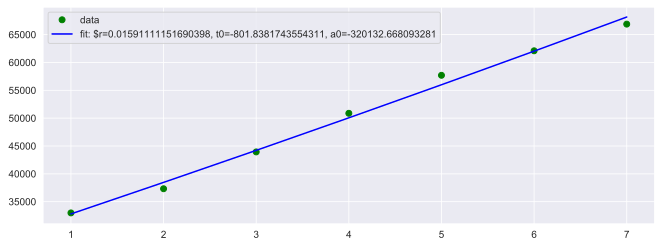

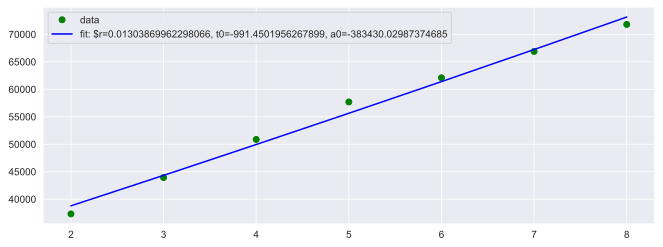

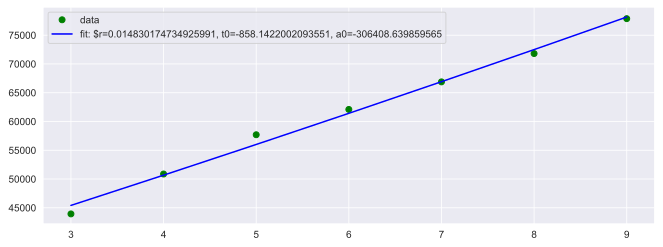

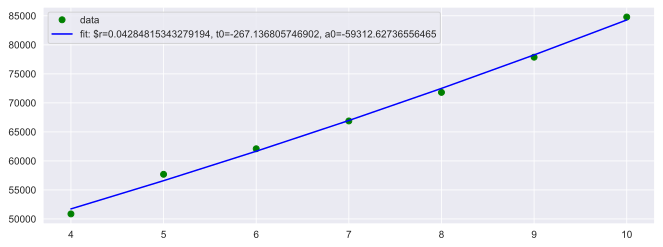

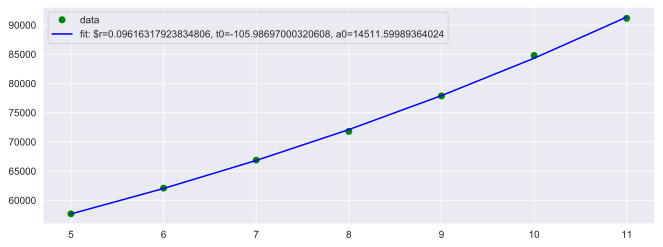

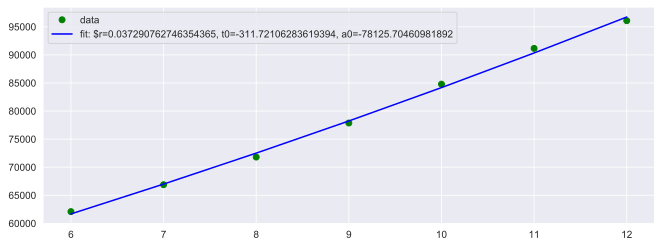

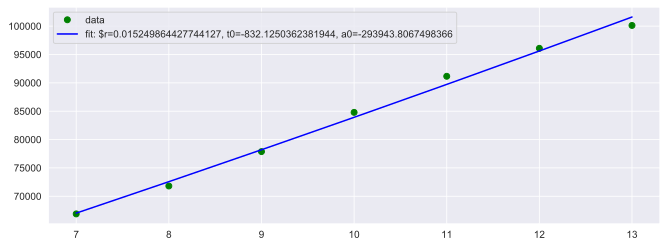

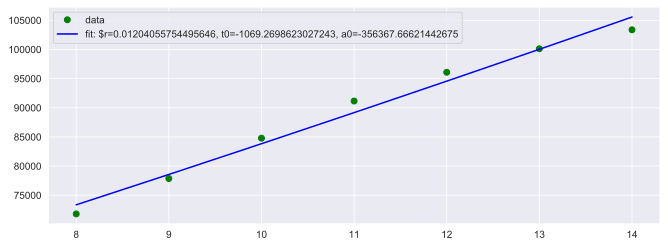

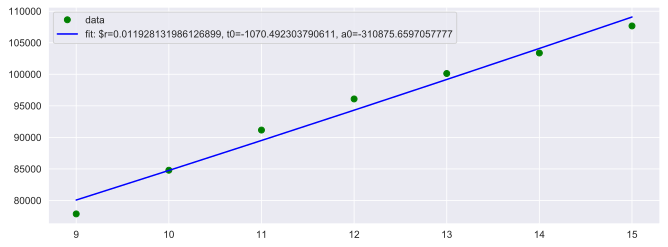

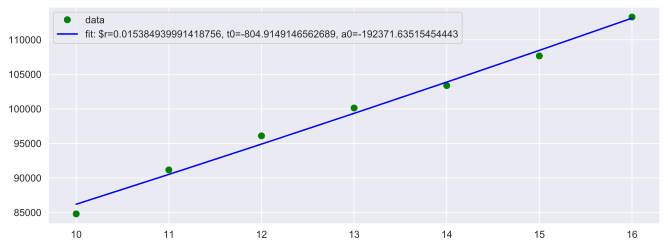

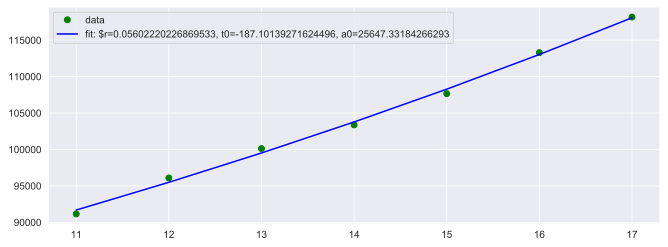

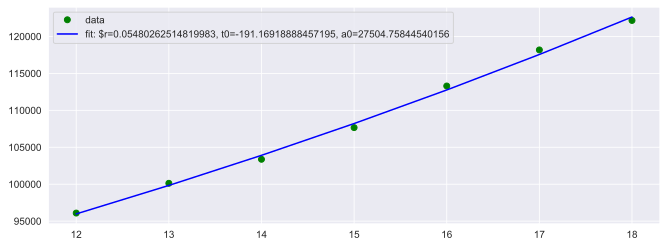

In [19]:
    
c = stack_country('Germany')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])
#

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 15368.779824906384
r   : 0.0218
t0  : -570
a0  : -1.82e+05

r=0.02178621316061403, t0=-569.6785885892524, a0=-181680.51764585768
Working on 1 to 8, this is 1/20
reduced chi^2: 90143.08860961192
r   : 0.0155
t0  : -820
a0  : -2.73e+05

r=0.015515560643309948, t0=-820.4017716018084, a0=-273094.03659388097
Working on 2 to 9, this is 2/20
reduced chi^2: 186271.31467786513
r   : 0.0133
t0  : -967
a0  : -3.07e+05

r=0.01325850957931102, t0=-967.4777670962225, a0=-306590.18538857414
Working on 3 to 10, this is 3/20
reduced chi^2: 142803.02615792578
r   : 0.0138
t0  : -924
a0  : -2.61e+05

r=0.013750989137135263, t0=-923.9061283938872, a0=-261240.02961577554
Working on 4 to 11, this is 4/20
reduced chi^2: 71656.2640635771
r   : 0.0157
t0  : -798
a0  : -1.96e+05

r=0.01565218999803136, t0=-798.2032464619767, a0=-196232.29036321174
Working on 5 to 12, this is 5/20
reduced chi^2: 13451.611646673811
r   : 0.0204
t0  : -596
a0 

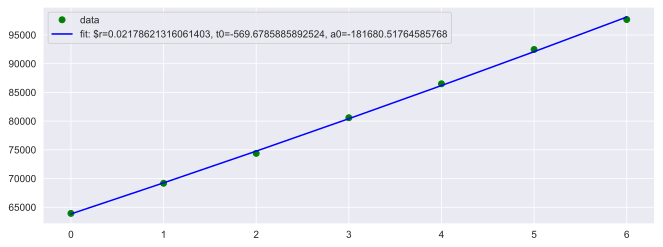

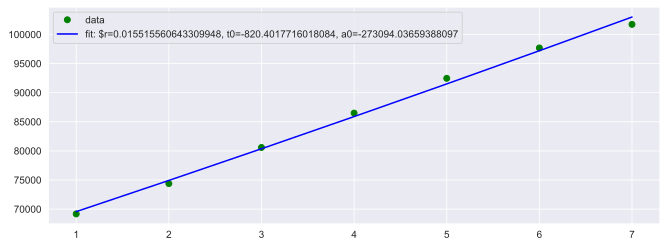

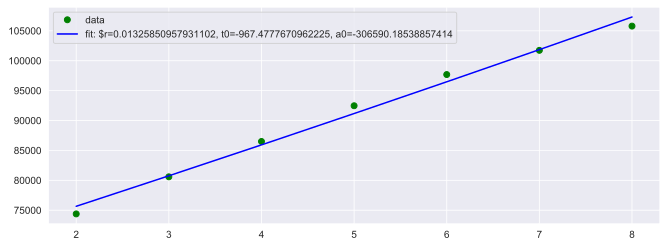

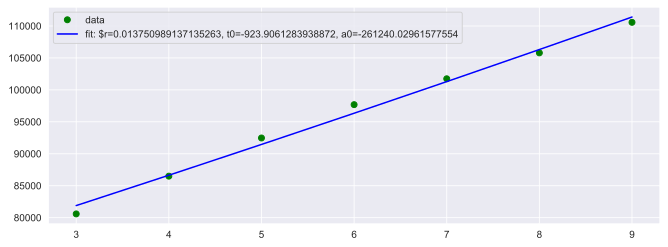

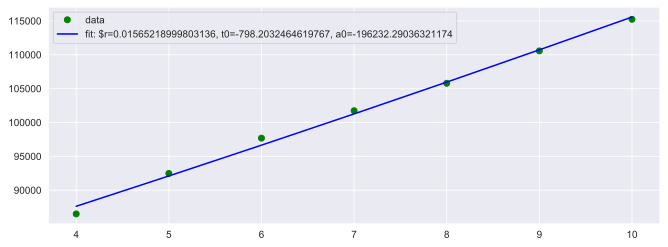

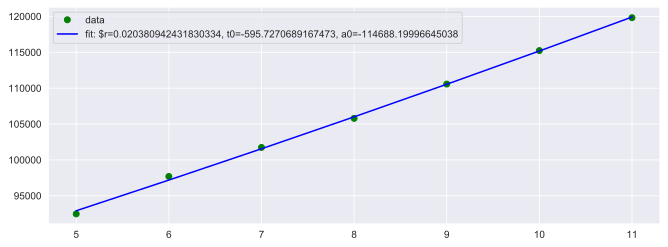

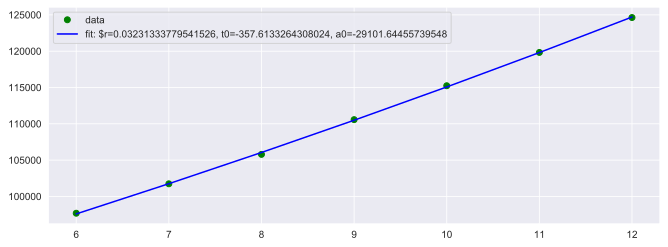

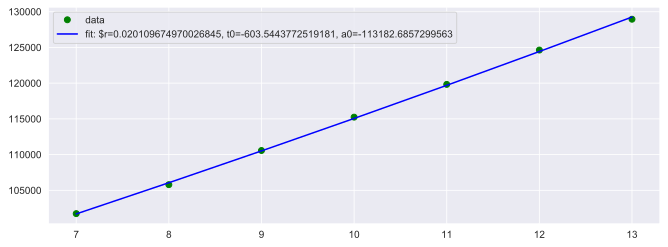

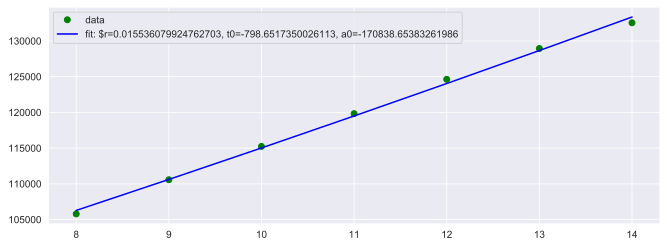

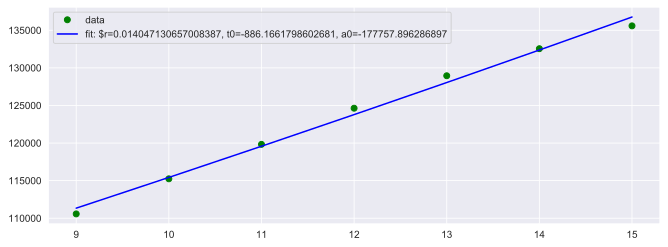

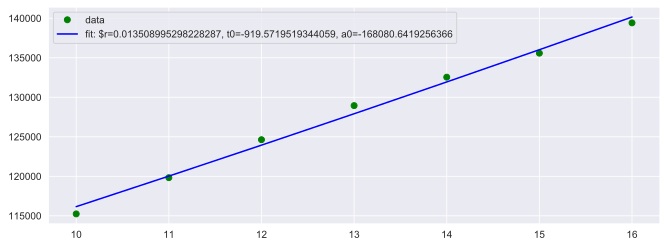

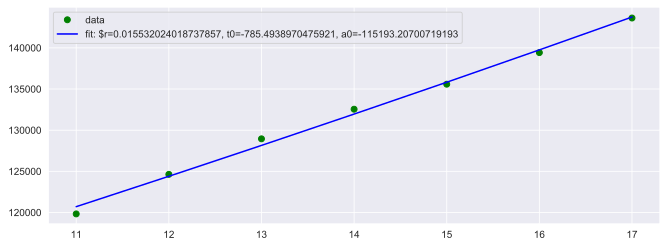

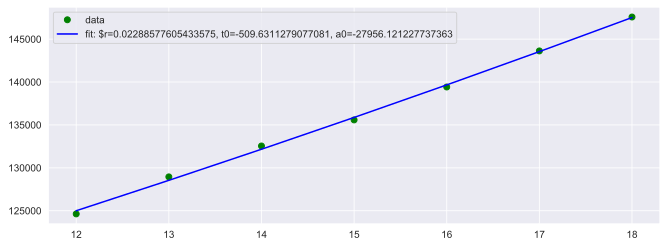

In [20]:
c = stack_country('Italy')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 303989.9237107239
r   : 0.119
t0  : -96.1
a0  : -5.28e+04

r=0.11927025425598838, t0=-96.12180495171124, a0=-52844.924491695354
Working on 1 to 8, this is 1/20
reduced chi^2: 168952.7261713204
r   : 0.0703
t0  : -173
a0  : -1.57e+05

r=0.07027363108896088, t0=-173.361640124299, a0=-157199.07939106904
Working on 2 to 9, this is 2/20
reduced chi^2: 134053.93433216907
r   : 0.0682
t0  : -179
a0  : -1.72e+05

r=0.06824281485866103, t0=-179.44465023850606, a0=-172090.43909964885
Working on 3 to 10, this is 3/20
reduced chi^2: 92876.33900220206
r   : 0.0811
t0  : -148
a0  : -1.22e+05

r=0.08112451745053817, t0=-147.83632050798738, a0=-122008.66858690127
Working on 4 to 11, this is 4/20
reduced chi^2: 91268.7193460279
r   : 0.0948
t0  : -124
a0  : -8.23e+04

r=0.09476370587781228, t0=-123.9543383204228, a0=-82289.5537658948
Working on 5 to 12, this is 5/20
reduced chi^2: 72369.72262418302
r   : 0.0988
t0  : -118
a0  : -7.

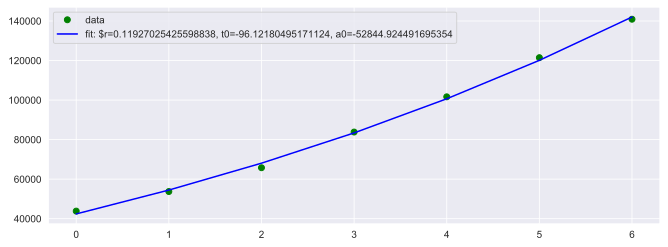

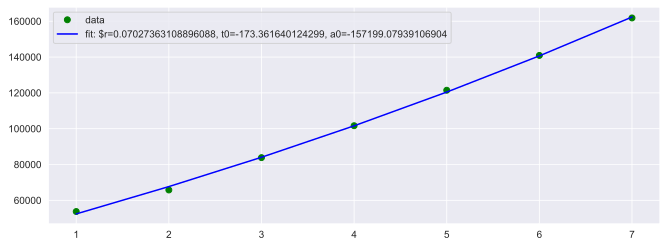

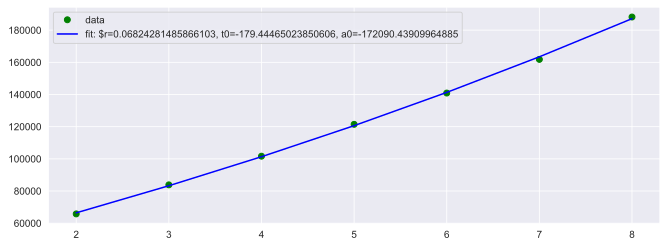

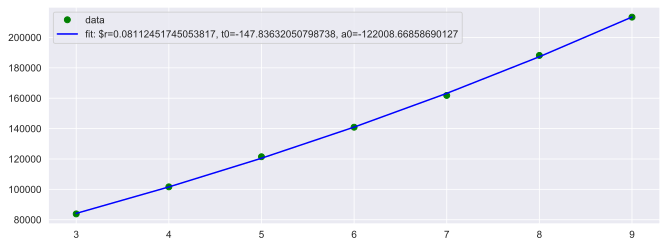

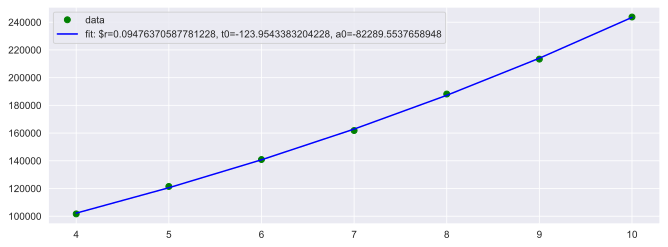

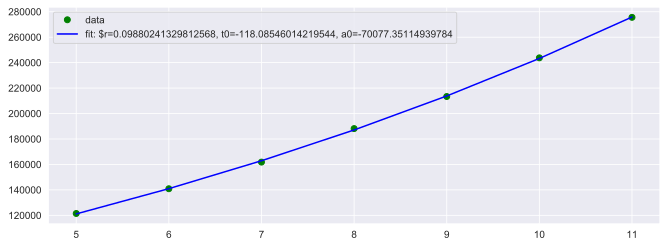

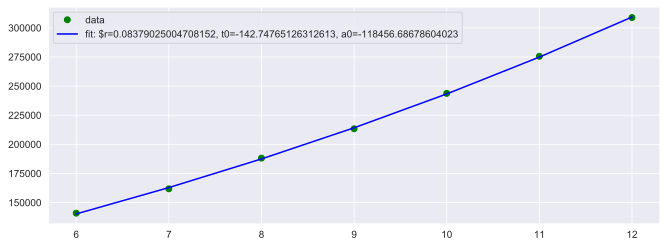

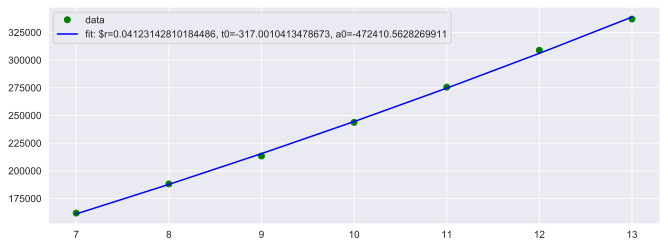

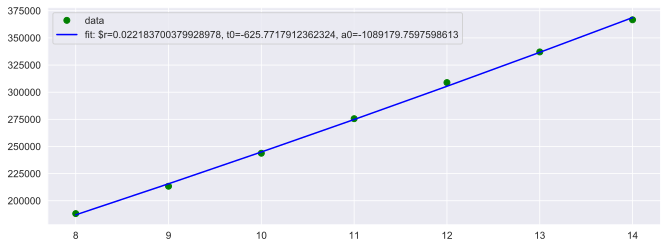

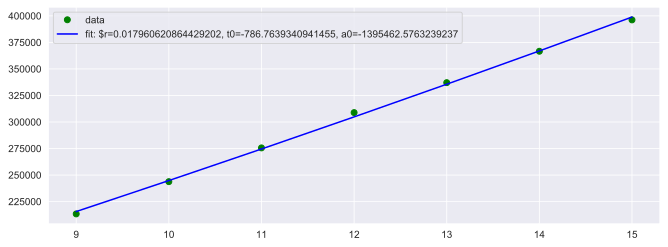

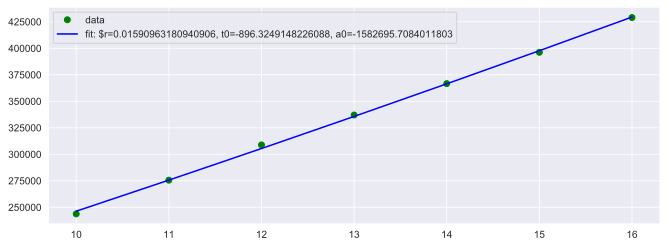

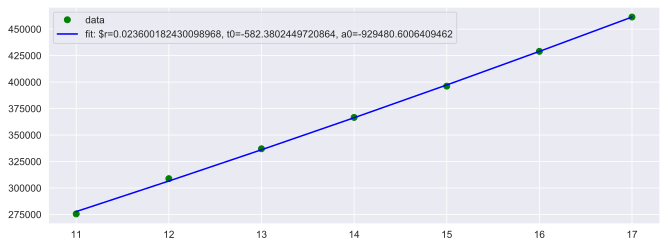

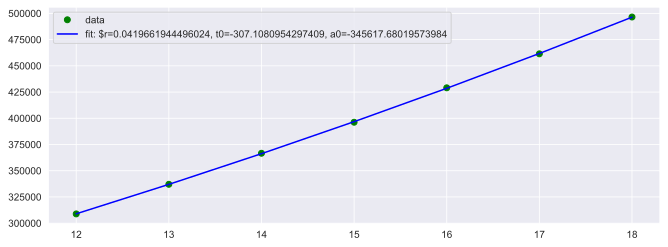

In [21]:
c = stack_country('US')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 161765.7331487239
r   : 0.0193
t0  : -666
a0  : -3.46e+05

r=0.019300057434837082, t0=-665.7242803304955, a0=-345845.3459755819
Working on 1 to 8, this is 1/20
reduced chi^2: 162196.6121070889
r   : 0.0155
t0  : -844
a0  : -4.44e+05

r=0.015502060204771642, t0=-843.5678124098965, a0=-443773.33576045523
Working on 2 to 9, this is 2/20
reduced chi^2: 41422.40645747123
r   : 0.0182
t0  : -708
a0  : -3.48e+05

r=0.018170854503815604, t0=-707.5902512091521, a0=-347545.60359530826
Working on 3 to 10, this is 3/20
reduced chi^2: 13422.176669570143
r   : 0.0232
t0  : -543
a0  : -2.5e+05

r=0.02315950480274555, t0=-542.6612671499691, a0=-249619.422065519
Working on 4 to 11, this is 4/20
reduced chi^2: 5409.523478655758
r   : 0.0276
t0  : -447
a0  : -1.92e+05

r=0.027606244023367227, t0=-447.335710201465, a0=-191968.7083426801
Working on 5 to 12, this is 5/20
reduced chi^2: 25946.78018913478
r   : 0.0204
t0  : -621
a0  : -2.

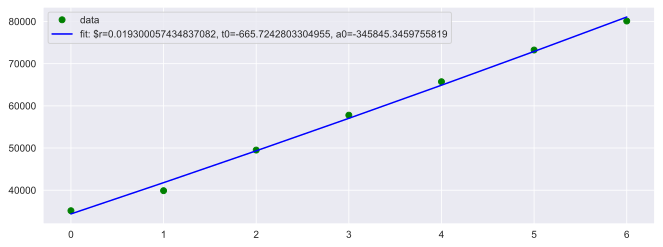

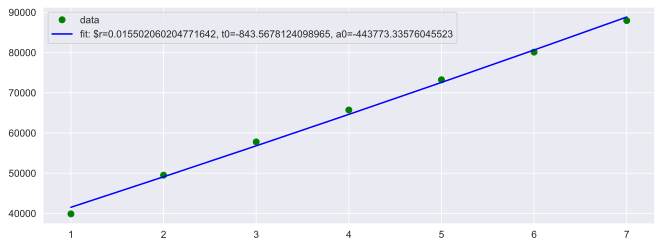

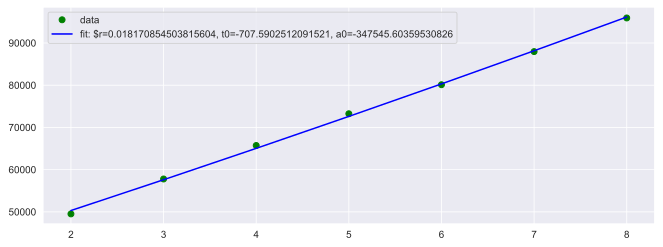

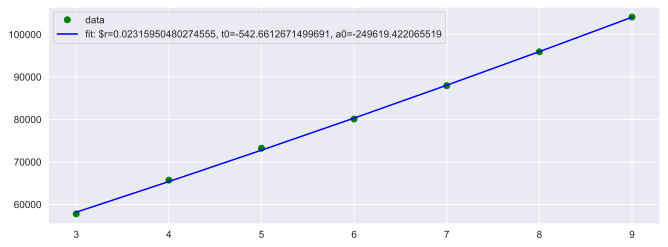

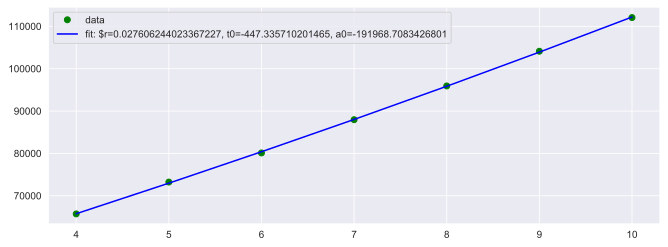

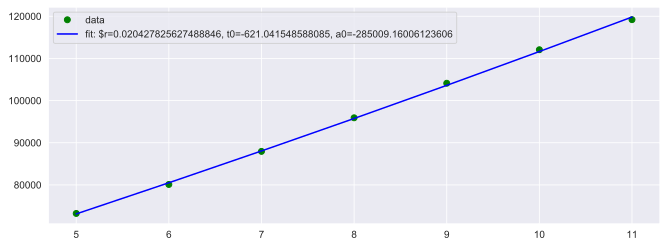

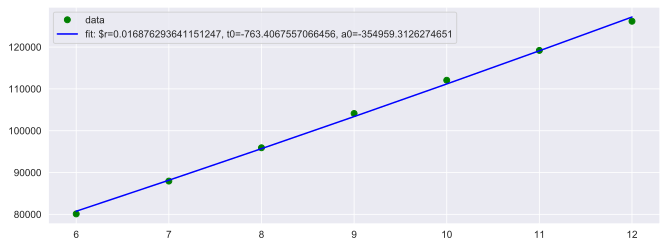

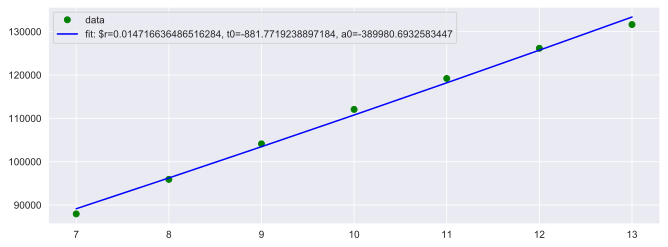

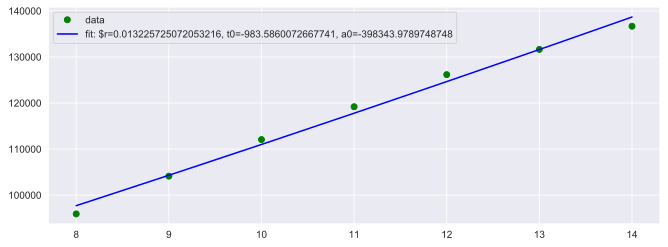

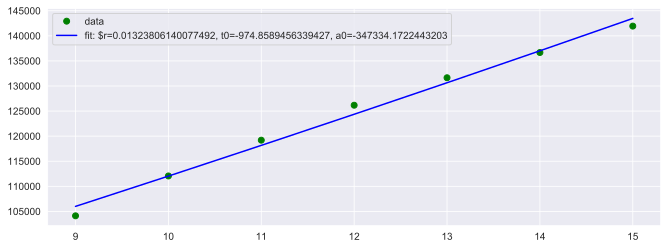

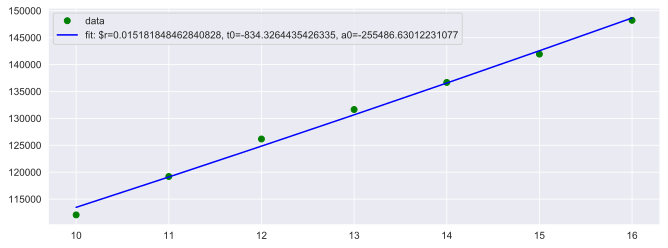

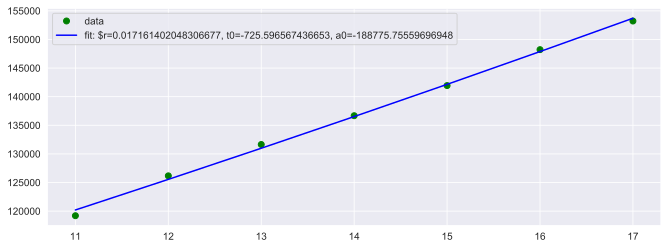

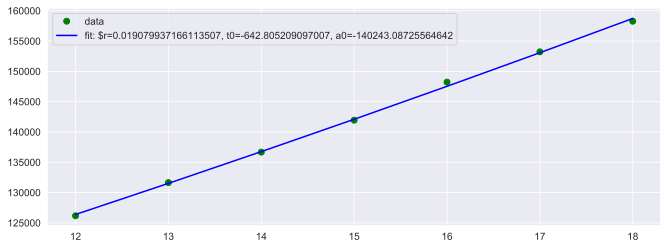

In [22]:
c = stack_country('Spain')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 0.014097756776676332
r   : 0.0532
t0  : -9.41
a0  : 6.78e+04

r=0.053185921508903354, t0=-9.40890366776036, a0=67798.90501734967
Working on 1 to 8, this is 1/20
reduced chi^2: 1.3673821308582253e-05
r   : -0.0014
t0  : 7.06
a0  : 6.78e+04

r=-0.0013986064288800844, t0=7.057105746489962, a0=67800.00409242738
Working on 2 to 9, this is 2/20
reduced chi^2: 5.348126458998429e-08
r   : 0.000259
t0  : 8.09
a0  : 6.78e+04

r=0.0002585465978602094, t0=8.093156724549287, a0=67800.00099586567
Working on 3 to 10, this is 3/20
reduced chi^2: 2.103960540399009e-05
r   : 3.48
t0  : 9
a0  : 6.78e+04

r=3.479981598690569, t0=8.999461456620047, a0=67800.99777159451
Working on 4 to 11, this is 4/20
reduced chi^2: 0.00712830617146656
r   : 0.528
t0  : 9.57
a0  : 6.78e+04

r=0.527666021616224, t0=9.572044674577045, a0=67800.85824913568
Working on 5 to 12, this is 5/20
reduced chi^2: 0.00992709342354226
r   : 0.125
t0  : 3.73
a0  : 6.7

RuntimeError: exception was raised in user function
User function arguments:
     r = -169.569655
    t0 = +19.931790
    a0 = +67337.720874
Original python exception in user function:
OverflowError: (34, 'Result too large')
  File "<ipython-input-15-6349838f1c32>", line 19, in least_squares
    return sum((ydata - model(xdata, r, t0, a0))**2)/yvar


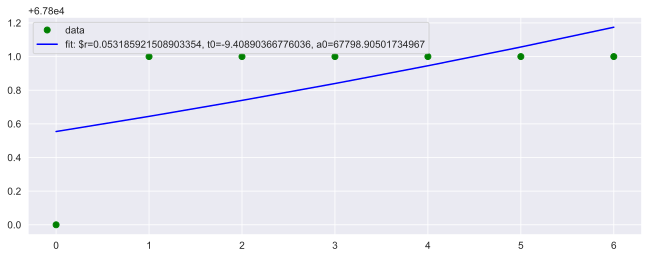

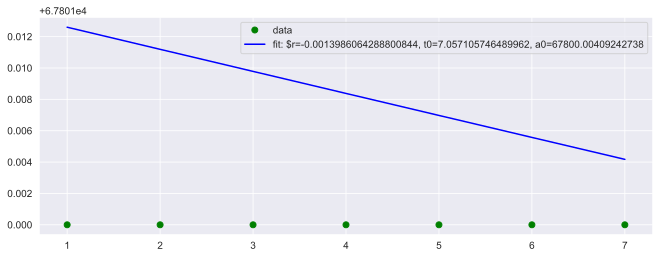

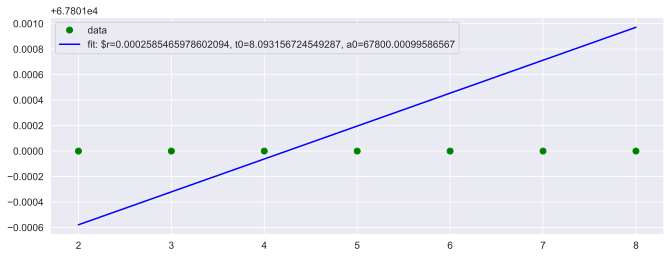

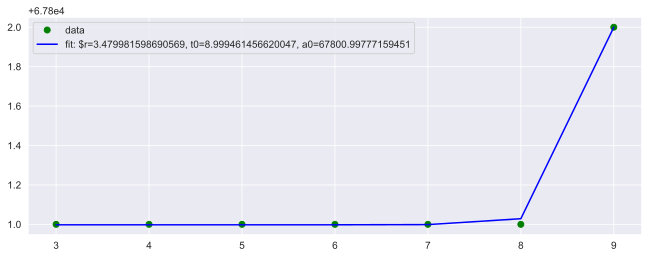

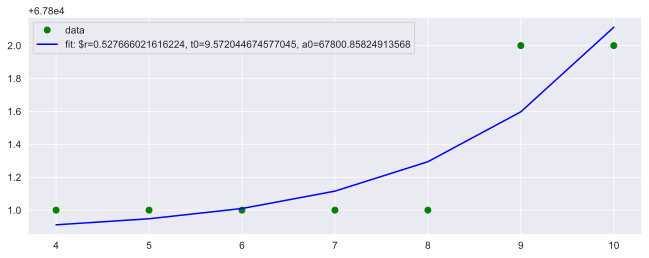

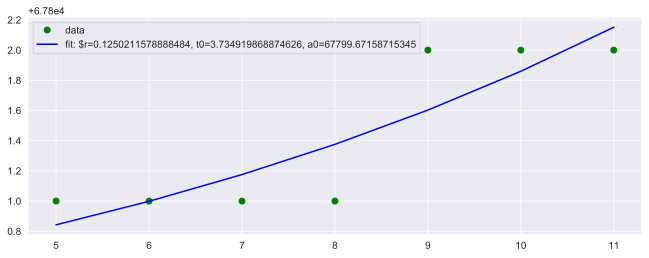

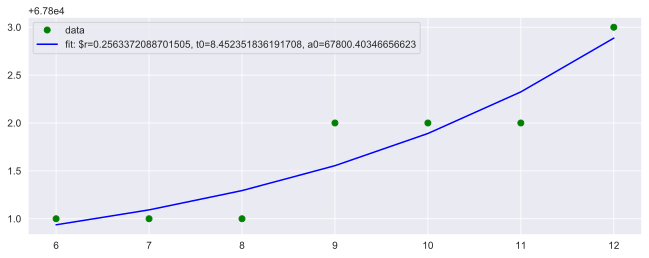

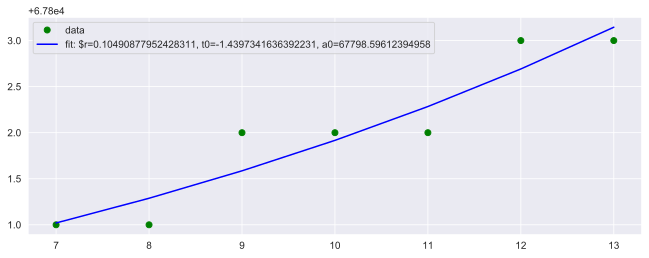

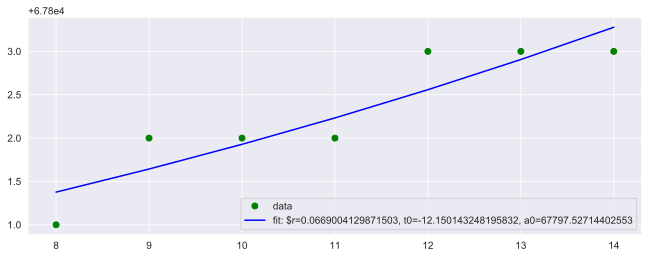

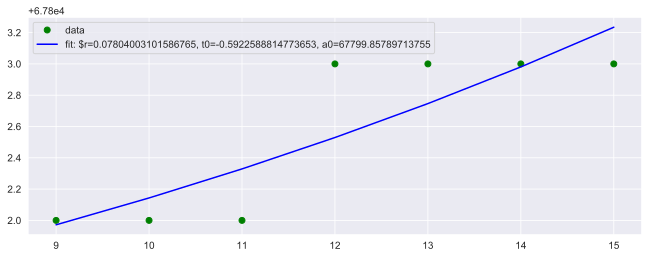

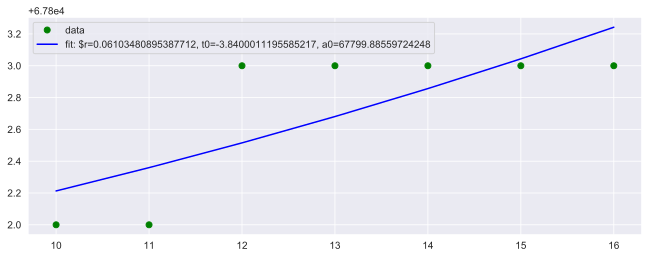

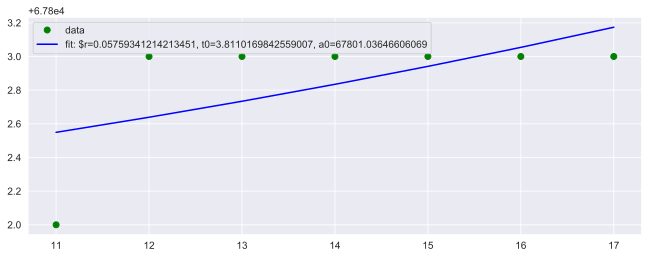

In [23]:
c = stack_country('China')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

In [ ]:
p_confirmed.tail(n=10)

In [ ]:
p_confirmed['double_time'] = double_time(p_confirmed['r'])

In [ ]:
p_confirmed.tail(n=10)

Log basics ...

In [ ]:
ax0, ax1, ax2, ax3 = overview_plot(c)
ax2.plot(p_confirmed.index, p_confirmed['double_time'], 'xb', label='double time confirmed fit')


In [ ]:
from math import log 
log(2)/log(0.5)

From https://en.wikipedia.org/wiki/Doubling_time
    
$$\Delta t = (t_2 - t_1) * \left(\frac{\log(2)}{\log
    \left(\frac{f(t_2)}{f(t_1)}\right)}\right)$$

In [ ]:
from math import log
def double_time_exponential2(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate2(double_time):
    return log(2)/double_time


t1, t2, q1, q2 = 0, 1, 1, 2
double_time_exponential2(t1, t2, q1, q2), growth_rate2(double_time_exponential2(t1, t2, q1, q2) )

In [ ]:
2**(1/double_time_exponential2(0, 1, 1, 21))

In [ ]:
2/math.exp(1)

In [ ]:
math.exp(0.5)/2

In [ ]:
math.exp(0.6931471805599453*4)

In [ ]:
def logplots(c, columns, ax=None, alpha=0.7):
    """Dataframe c with colunmname 'column' contains the data we are interested in.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax = ax
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        pass
    
    for col in columns:
        assert col in c.columns
        c2 = c.copy()
        c2['change'] = c2[col].diff()
    
        ax.plot(c2[col], c2['change'], '-o', label=c.country + " " + col, alpha=alpha) 
    
    ax.legend()
    ax.set_xlabel("total numbers")
    ax.set_ylabel("daily change in numbers")
    return ax

    
    
c = stack_country("Germany")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'])

c = stack_country("China")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Italy")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Spain")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("US")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("India")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()

c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)


In [ ]:
c

In [ ]:
confirmed.loc['Germany']

In [ ]:
deaths.loc['Germany']

In [ ]:
confirmed.loc['US']

In [ ]:
deaths.loc['US']

In [ ]:
confirmed.loc['China']

In [ ]:
deaths.loc['China']

In [ ]:
confirmed.loc['Italy']

In [ ]:
deaths.loc['Italy']

In [ ]:
confirmed.loc['Spain']

In [ ]:
deaths.loc['Spain']

In [ ]:
confirmed.loc['India']

In [ ]:
deaths.loc['India']